In [389]:
import pandas as pd
import numpy as np
import seaborn as sb





In [390]:
data= pd.read_csv("Data/allbp.data")
data.columns= ["age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","sick","pregnant","thyroid_surgery","I131_treatment", "query_hypothyroid","query_hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG","Referral_source", "Class"]
# columns=["age","sex","on_thyroxine","query_on_thyroxine","on_antithyroid_medication","sick","pregnant","thyroid_surgery","I131_treatment", "query_hypothyroid","query_hyperthyroid","lithium","goitre","tumor","hypopituitary","psych","TSH_measured","TSH","T3_measured","T3","TT4_measured","TT4","T4U_measured","T4U","FTI_measured","FTI","TBG_measured","TBG","Referral_source", "Class"]
#data.head(500)
print(data.dtypes)
#data["age"]= data.age.astype(float)
print("################################################")



age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [391]:
data["Class"]= [x.split(".")[0] for x in data["Class"]]

In [392]:

def SearchKeyInColumns(dataset, key="NaN"):
    data= dataset.copy()
    cols=data.columns
    column_search_freq_dictionary={}
    for i in cols:
        count=0
        for j in data[i]:
            if j==key:
                count=count+1
        column_search_freq_dictionary[i]= count
        
    return column_search_freq_dictionary

def RelevanceColumnFilter(dataset, key="NaN", filter_threshold=0.8):
    dictionary= SearchKeyInColumns(dataset, key)
    data= dataset.copy()
    columns_to_drop= []
    
    filter_threshold= filter_threshold*len(data)
    for i in dictionary.items():
        if i[1]>=filter_threshold:
            columns_to_drop.append(i[0])
    #print("Column to drop: ", columns_to_drop)
    data.drop(columns=columns_to_drop, inplace=True)
    
    return data

In [393]:
print(SearchKeyInColumns(data, key="?"))

{'age': 1, 'sex': 110, 'on_thyroxine': 0, 'query_on_thyroxine': 0, 'on_antithyroid_medication': 0, 'sick': 0, 'pregnant': 0, 'thyroid_surgery': 0, 'I131_treatment': 0, 'query_hypothyroid': 0, 'query_hyperthyroid': 0, 'lithium': 0, 'goitre': 0, 'tumor': 0, 'hypopituitary': 0, 'psych': 0, 'TSH_measured': 0, 'TSH': 284, 'T3_measured': 0, 'T3': 585, 'TT4_measured': 0, 'TT4': 184, 'T4U_measured': 0, 'T4U': 297, 'FTI_measured': 0, 'FTI': 295, 'TBG_measured': 0, 'TBG': 2799, 'Referral_source': 0, 'Class': 0}


In [394]:
data= RelevanceColumnFilter(data, key="?", filter_threshold=0.9)

In [395]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'Referral_source', 'Class'],
      dtype='object')

In [396]:

def ReplaceMeanAndMode(dataset, key='NaN'):
    
    data= dataset.copy()
    cols= data.columns
    for i in cols:
        
        data[i]=data[i].astype(object)
        if not data[i][0].isalpha():
        
            total=0
            count=0
            total= sum([float(x) for x in np.array(data[i]) if x != key])
            count= sum([1.0 for x in np.array(data[i]) if x != key])
            mean=total/count
            data[i].replace(key, mean,inplace=True)
        
        else:
            
            data[i].replace(key,np.nan,inplace=True)
            data[i].replace(np.nan, data[i].mode(), inplace=True)
    
    return data


def Diff(list1, list2):
    list_dif = [i for i in list1 + list2 if i not in list1 or i not in list2]
        
    return list_dif           
   

def GetAttributesInCategory(dataset, target_attribute, include_target_attribute=False):
    data= dataset.copy()
    cols= data.columns
    Nominal_cols=[]
    for i in cols:
        
        data[i]=data[i].astype(object)
        if include_target_attribute:
        
            if i != target_attribute:
                if data[i][0].isalpha():
                    Nominal_cols.append(i)
        
        else:
            if data[i][0].isalpha():
                Nominal_cols.append(i)
    templist=Nominal_cols.copy()
    templist.append(target_attribute)
    return Nominal_cols, Diff(list(data.columns.values),templist)


def ChangeType(dataset, cols):
    data= dataset.copy()
    print("NonCategoriacla columns: ",cols)    
    for i in cols:
        data[i]=data[i].astype(float)
    
    return data





In [397]:
colNom, NumcolNom= GetAttributesInCategory(data, "Class", True)
print("Categorical Attributes----->",colNom, "\nNumerical Atrributes----->",NumcolNom)
data= ReplaceMeanAndMode(data, key='?')

Categorical Attributes-----> ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'Referral_source'] 
Numerical Atrributes-----> ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [398]:
print(SearchKeyInColumns(data, key="?"))

{'age': 0, 'sex': 0, 'on_thyroxine': 0, 'query_on_thyroxine': 0, 'on_antithyroid_medication': 0, 'sick': 0, 'pregnant': 0, 'thyroid_surgery': 0, 'I131_treatment': 0, 'query_hypothyroid': 0, 'query_hyperthyroid': 0, 'lithium': 0, 'goitre': 0, 'tumor': 0, 'hypopituitary': 0, 'psych': 0, 'TSH_measured': 0, 'TSH': 0, 'T3_measured': 0, 'T3': 0, 'TT4_measured': 0, 'TT4': 0, 'T4U_measured': 0, 'T4U': 0, 'FTI_measured': 0, 'FTI': 0, 'TBG_measured': 0, 'Referral_source': 0, 'Class': 0}


In [399]:
print(SearchKeyInColumns(data, key=np.nan))
data

{'age': 0, 'sex': 0, 'on_thyroxine': 0, 'query_on_thyroxine': 0, 'on_antithyroid_medication': 0, 'sick': 0, 'pregnant': 0, 'thyroid_surgery': 0, 'I131_treatment': 0, 'query_hypothyroid': 0, 'query_hyperthyroid': 0, 'lithium': 0, 'goitre': 0, 'tumor': 0, 'hypopituitary': 0, 'psych': 0, 'TSH_measured': 0, 'TSH': 0, 'T3_measured': 0, 'T3': 0, 'TT4_measured': 0, 'TT4': 0, 'T4U_measured': 0, 'T4U': 0, 'FTI_measured': 0, 'FTI': 0, 'TBG_measured': 0, 'Referral_source': 0, 'Class': 0}


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,Referral_source,Class
0,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,0.997855,f,110.789,f,other,negative
1,46,M,f,f,f,f,f,f,f,f,...,2.02475,t,109,t,0.91,t,120,f,other,negative
2,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,0.997855,f,110.789,f,other,negative
3,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,SVI,negative
4,18,F,t,f,f,f,f,f,f,f,...,2.02475,t,183,t,1.3,t,141,f,other,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,70,M,f,f,f,f,f,f,f,f,...,2.02475,t,155,t,1.05,t,148,f,SVI,negative
2795,73,M,f,t,f,f,f,f,f,f,...,0.7,t,63,t,0.88,t,72,f,other,negative
2796,75,M,f,f,f,f,f,f,f,f,...,2.02475,t,147,t,0.8,t,183,f,other,negative
2797,60,F,f,f,f,f,f,f,f,f,...,2.02475,t,100,t,0.83,t,121,f,other,negative


In [400]:

data= pd.get_dummies(data,columns=colNom)

In [401]:
data

,age,TSH,T3,TT4,T4U,FTI,Class,sex_F,sex_M,on_thyroxine_f,...,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,Referral_source_STMW,Referral_source_SVHC,Referral_source_SVHD,Referral_source_SVI,Referral_source_other
0,23,4.1,2,102,0.997855,110.789,negative,1,0,1,...,1,0,1,0,1,0,0,0,0,1
1,46,0.98,2.02475,109,0.91,120,negative,0,1,1,...,0,1,0,1,1,0,0,0,0,1
2,70,0.16,1.9,175,0.997855,110.789,negative,1,0,0,...,1,0,1,0,1,0,0,0,0,1
3,70,0.72,1.2,61,0.87,70,negative,1,0,1,...,0,1,0,1,1,0,0,0,1,0
4,18,0.03,2.02475,183,1.3,141,negative,1,0,0,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,70,2.7,2.02475,155,1.05,148,negative,0,1,1,...,0,1,0,1,1,0,0,0,1,0
2795,73,4.67349,0.7,63,0.88,72,negative,0,1,1,...,0,1,0,1,1,0,0,0,0,1
2796,75,4.67349,2.02475,147,0.8,183,negative,0,1,1,...,0,1,0,1,1,0,0,0,0,1
2797,60,1.4,2.02475,100,0.83,121,negative,1,0,1,...,0,1,0,1,1,0,0,0,0,1


In [402]:
##
##  got features and eliminated the missing values
##  Now----> Reduce dimension -----> Prediction
##
data= ChangeType(data,NumcolNom)

NonCategoriacla columns:  ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


In [403]:
data.dtypes

age                            float64
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                            float64
Class                           object
sex_F                            uint8
sex_M                            uint8
on_thyroxine_f                   uint8
on_thyroxine_t                   uint8
query_on_thyroxine_f             uint8
query_on_thyroxine_t             uint8
on_antithyroid_medication_f      uint8
on_antithyroid_medication_t      uint8
sick_f                           uint8
sick_t                           uint8
pregnant_f                       uint8
pregnant_t                       uint8
thyroid_surgery_f                uint8
thyroid_surgery_t                uint8
I131_treatment_f                 uint8
I131_treatment_t                 uint8
query_hypothyroid_f              uint8
query_hypothyroid_t              uint8
query_hyperthyroid_f     

In [404]:
Y= data["Class"]
X= data.drop("Class",axis=1)
X

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,...,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,Referral_source_STMW,Referral_source_SVHC,Referral_source_SVHD,Referral_source_SVI,Referral_source_other
0,23.0,4.100000,2.000000,102.0,0.997855,110.788698,1,0,1,0,...,1,0,1,0,1,0,0,0,0,1
1,46.0,0.980000,2.024752,109.0,0.910000,120.000000,0,1,1,0,...,0,1,0,1,1,0,0,0,0,1
2,70.0,0.160000,1.900000,175.0,0.997855,110.788698,1,0,0,1,...,1,0,1,0,1,0,0,0,0,1
3,70.0,0.720000,1.200000,61.0,0.870000,70.000000,1,0,1,0,...,0,1,0,1,1,0,0,0,1,0
4,18.0,0.030000,2.024752,183.0,1.300000,141.000000,1,0,0,1,...,0,1,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,70.0,2.700000,2.024752,155.0,1.050000,148.000000,0,1,1,0,...,0,1,0,1,1,0,0,0,1,0
2795,73.0,4.673491,0.700000,63.0,0.880000,72.000000,0,1,1,0,...,0,1,0,1,1,0,0,0,0,1
2796,75.0,4.673491,2.024752,147.0,0.800000,183.000000,0,1,1,0,...,0,1,0,1,1,0,0,0,0,1
2797,60.0,1.400000,2.024752,100.0,0.830000,121.000000,1,0,1,0,...,0,1,0,1,1,0,0,0,0,1


In [405]:
count = data['Class'].value_counts() 
print(count) 
C=X.columns
for i in C:
    p= np.array(X[i])
    print(p[0])
    m= np.mean(p)
    #print()
    std= np.std(p)
    X[i]= [(x - m)/std for x in p]
    


negative                     2666
increased binding protein     124
decreased binding protein       9
Name: Class, dtype: int64
23.0
4.1
2.0
102.0
0.9978553157474003
110.7886980830671
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
1
0
1
0
1
0
0
0
0
1


/home/devendra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


In [406]:
X.dropna(axis=1)

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,...,TT4_measured_t,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,Referral_source_STMW,Referral_source_SVHC,Referral_source_SVHD,Referral_source_SVI,Referral_source_other
0,-1.410219,-2.820623e-02,-3.375240e-02,-0.206569,-9.666281e-15,4.568991e-16,0.728248,-0.665979,0.365592,-0.365592,...,0.265261,2.902455,-2.902455,2.913441,-2.913441,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
1,-0.285880,-1.816584e-01,4.844644e-15,-0.001938,-4.780763e-01,2.961564e-01,-1.373159,1.501550,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
2,0.887342,-2.219887e-01,-1.701170e-01,1.927433,-9.666281e-15,4.568991e-16,0.728248,-0.665979,-2.735291,2.735291,...,0.265261,2.902455,-2.902455,2.913441,-2.913441,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
3,0.887342,-1.944461e-01,-1.124669e+00,-1.405118,-6.957416e-01,-1.311414e+00,0.728248,-0.665979,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,1.621835,-1.182564
4,-1.654640,-2.283826e-01,4.844644e-15,2.161296,1.644160e+00,9.713361e-01,0.728248,-0.665979,-2.735291,2.735291,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,0.887342,-9.706296e-02,4.844644e-15,1.342775,2.837522e-01,1.196396e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,1.621835,-1.182564
2795,1.033995,-1.310509e-16,-1.806492e+00,-1.346652,-6.413253e-01,-1.247112e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
2796,1.131763,-1.310509e-16,4.844644e-15,1.108912,-1.076656e+00,2.321696e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,-0.616585,0.845620
2797,0.398499,-1.610014e-01,4.844644e-15,-0.265035,-9.134069e-01,3.283078e-01,0.728248,-0.665979,0.365592,-0.365592,...,0.265261,-0.344536,0.344536,-0.343237,0.343237,-0.183314,-0.329416,-0.105827,-0.616585,0.845620


In [407]:
normalizedX= X.copy()

In [408]:
normalizedX.columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'sick_f', 'sick_t', 'pregnant_f',
       'pregnant_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'I131_treatment_f', 'I131_treatment_t', 'query_hypothyroid_f',
       'query_hypothyroid_t', 'query_hyperthyroid_f', 'query_hyperthyroid_t',
       'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t',
       'TSH_measured_f', 'TSH_measured_t', 'T3_measured_f', 'T3_measured_t',
       'TT4_measured_f', 'TT4_measured_t', 'T4U_measured_f', 'T4U_measured_t',
       'FTI_measured_f', 'FTI_measured_t', 'TBG_measured_f',
       'Referral_source_STMW', 'Referral_source_SVHC', 'Referral_source_SVHD',
       'Referral_source_SVI', 'Referral_source_other'],
      dtype='object')

In [409]:
X.corr()

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,...,T4U_measured_f,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,Referral_source_STMW,Referral_source_SVHC,Referral_source_SVHD,Referral_source_SVI,Referral_source_other
age,1.000000,-5.678820e-02,-2.205816e-01,-5.034359e-02,-1.547492e-01,3.565917e-02,0.011989,-0.005844,-0.004494,0.004494,...,-8.619036e-02,8.619036e-02,-8.509971e-02,8.509971e-02,NaN,-0.191747,-0.106809,0.043507,0.277375,-0.127210
TSH,-0.056788,1.000000e+00,-1.389224e-01,-2.493070e-01,6.580366e-02,-2.818413e-01,0.021424,-0.036599,-0.013113,0.013113,...,5.957589e-03,-5.957589e-03,6.375768e-03,-6.375768e-03,NaN,0.027702,-0.045622,-0.012969,-0.013647,0.032650
T3,-0.220582,-1.389224e-01,1.000000e+00,5.143806e-01,4.211828e-01,3.114737e-01,0.054717,-0.064727,-0.023946,0.023946,...,-4.731418e-03,4.731418e-03,-3.556355e-03,3.556355e-03,NaN,0.244607,0.053923,-0.008928,-0.308504,0.160936
TT4,-0.050344,-2.493070e-01,5.143806e-01,1.000000e+00,4.258248e-01,7.804164e-01,0.154017,-0.159259,-0.210453,0.210453,...,-3.325925e-02,3.325925e-02,-3.121340e-02,3.121340e-02,NaN,0.205525,-0.022813,0.023353,-0.149393,0.070225
T4U,-0.154749,6.580366e-02,4.211828e-01,4.258248e-01,1.000000e+00,-1.730493e-01,0.218531,-0.222118,-0.050927,0.050927,...,-3.058761e-15,3.051816e-15,-3.027223e-15,3.029940e-15,NaN,0.333140,-0.009165,0.016800,-0.196525,0.060192
FTI,0.035659,-2.818413e-01,3.114737e-01,7.804164e-01,-1.730493e-01,1.000000e+00,0.026118,-0.031802,-0.178374,0.178374,...,-8.420775e-04,8.420775e-04,1.192007e-16,-1.222673e-16,NaN,0.016179,-0.027829,0.004537,-0.037785,0.044226
sex_F,0.011989,2.142357e-02,5.471703e-02,1.540167e-01,2.185312e-01,2.611845e-02,1.000000,-0.914495,-0.091637,0.091637,...,3.394815e-02,-3.394815e-02,3.479979e-02,-3.479979e-02,NaN,0.074234,-0.136539,0.012505,-0.098829,0.142484
sex_M,-0.005844,-3.659927e-02,-6.472683e-02,-1.592591e-01,-2.221181e-01,-3.180160e-02,-0.914495,1.000000,0.082589,-0.082589,...,-4.841326e-02,4.841326e-02,-4.952989e-02,4.952989e-02,NaN,-0.117717,0.158472,-0.011283,0.112860,-0.153035
on_thyroxine_f,-0.004494,-1.311307e-02,-2.394594e-02,-2.104529e-01,-5.092721e-02,-1.783736e-01,-0.091637,0.082589,1.000000,-1.000000,...,2.523817e-02,-2.523817e-02,2.446272e-02,-2.446272e-02,NaN,0.029539,0.090608,-0.014239,0.188221,-0.232756
on_thyroxine_t,0.004494,1.311307e-02,2.394594e-02,2.104529e-01,5.092721e-02,1.783736e-01,0.091637,-0.082589,-1.000000,1.000000,...,-2.523817e-02,2.523817e-02,-2.446272e-02,2.446272e-02,NaN,-0.029539,-0.090608,0.014239,-0.188221,0.232756


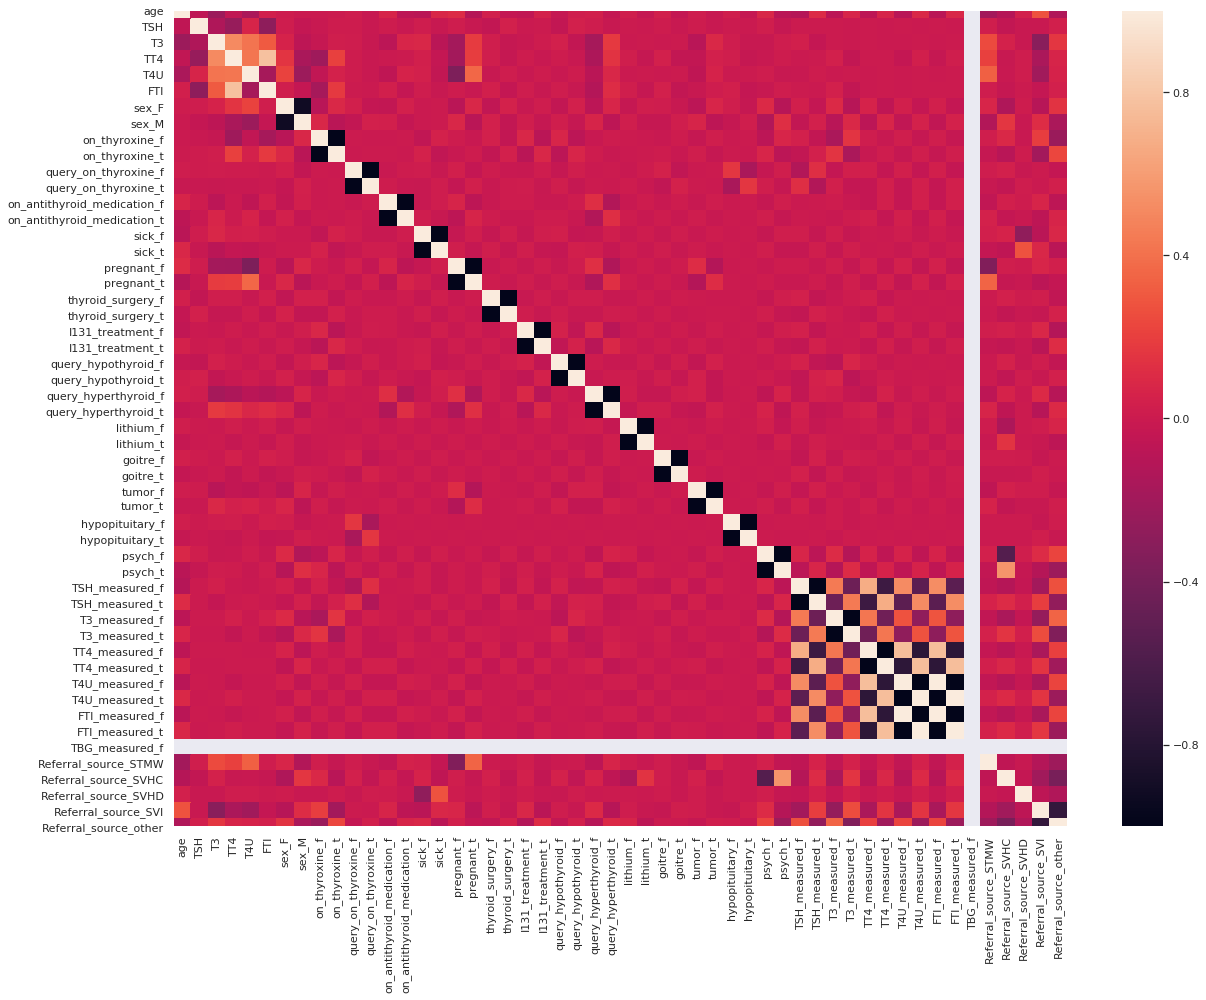

In [410]:
sb.set(rc={'figure.figsize':(20,15)})
sb.heatmap(data=X.corr())

In [411]:
# since data is imbalance and randomforest and the decision tree are not effected to imbalance nature of the dataset.
# so for now.. we will be applying RandomForest.

normalizedX['label']= Y

print(normalizedX.head(10))
normalizedX.dropna(axis=1)
normalizedX





        age           TSH            T3       TT4           T4U           FTI  \
0 -1.410219 -2.820623e-02 -3.375240e-02 -0.206569 -9.666281e-15  4.568991e-16   
1 -0.285880 -1.816584e-01  4.844644e-15 -0.001938 -4.780763e-01  2.961564e-01   
2  0.887342 -2.219887e-01 -1.701170e-01  1.927433 -9.666281e-15  4.568991e-16   
3  0.887342 -1.944461e-01 -1.124669e+00 -1.405118 -6.957416e-01 -1.311414e+00   
4 -1.654640 -2.283826e-01  4.844644e-15  2.161296  1.644160e+00  9.713361e-01   
5  0.349615 -1.310509e-16  4.844644e-15 -1.083556 -4.236600e-01 -1.054203e+00   
6  1.376185 -1.216547e-01 -1.942857e+00 -0.849693 -1.620819e+00  1.353993e-01   
7  0.691805 -2.003481e-01  2.389768e-01  0.407322 -3.692437e-01  6.819734e-01   
8  0.789574 -1.118180e-01 -5.792108e-01 -0.761994 -5.869090e-01 -5.719318e-01   
9  1.571722 -1.757564e-01  2.389768e-01  0.173459 -2.604110e-01  3.283078e-01   

      sex_F     sex_M  on_thyroxine_f  on_thyroxine_t  ...  T4U_measured_t  \
0  0.728248 -0.665979        0

,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,on_thyroxine_t,...,T4U_measured_t,FTI_measured_f,FTI_measured_t,TBG_measured_f,Referral_source_STMW,Referral_source_SVHC,Referral_source_SVHD,Referral_source_SVI,Referral_source_other,label
0,-1.410219,-2.820623e-02,-3.375240e-02,-0.206569,-9.666281e-15,4.568991e-16,0.728248,-0.665979,0.365592,-0.365592,...,-2.902455,2.913441,-2.913441,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
1,-0.285880,-1.816584e-01,4.844644e-15,-0.001938,-4.780763e-01,2.961564e-01,-1.373159,1.501550,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
2,0.887342,-2.219887e-01,-1.701170e-01,1.927433,-9.666281e-15,4.568991e-16,0.728248,-0.665979,-2.735291,2.735291,...,-2.902455,2.913441,-2.913441,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
3,0.887342,-1.944461e-01,-1.124669e+00,-1.405118,-6.957416e-01,-1.311414e+00,0.728248,-0.665979,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,1.621835,-1.182564,negative
4,-1.654640,-2.283826e-01,4.844644e-15,2.161296,1.644160e+00,9.713361e-01,0.728248,-0.665979,-2.735291,2.735291,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,0.887342,-9.706296e-02,4.844644e-15,1.342775,2.837522e-01,1.196396e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,1.621835,-1.182564,negative
2795,1.033995,-1.310509e-16,-1.806492e+00,-1.346652,-6.413253e-01,-1.247112e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
2796,1.131763,-1.310509e-16,4.844644e-15,1.108912,-1.076656e+00,2.321696e+00,-1.373159,1.501550,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative
2797,0.398499,-1.610014e-01,4.844644e-15,-0.265035,-9.134069e-01,3.283078e-01,0.728248,-0.665979,0.365592,-0.365592,...,0.344536,-0.343237,0.343237,NaN,-0.183314,-0.329416,-0.105827,-0.616585,0.845620,negative


In [412]:
normalizedX.to_excel(excel_writer="Thyroid.xlsx",index=False)